# Evaluation Of NST Models 

To evaluatve which of the 3 models used achieve a better result of tyle transfer, 3 methods are used below:

1) Comparing mean and STD of images

2) Plotting pixel histogram of images

3) Voting of images through google form

In [1]:
#Import libraries
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
import cv2 as cv

Using TensorFlow backend.


In [2]:
#Declare an empty list
result = []
content = []
style = []

#Append filepath from folders that stored results of 3 different models
result.append(glob.glob('./img/FastNST_img/*'))
result.append(glob.glob('./img/TL_model_img/*'))
result.append(glob.glob('./img/WCT_img/*'))

content.append(glob.glob('./img/cat.jpg'))
content.append(glob.glob('./img/changjiang6.jpg'))
content.append(glob.glob('./img/jay.jpg'))
content.append(glob.glob('./img/merlion.jpg'))
content.append(glob.glob('./img/shophouse.jpg'))

style.append(glob.glob('./img/chinese_2.jpg'))
style.append(glob.glob('./img/shanshui2.jpg'))
style.append(glob.glob('./img/khan.jpg'))
style.append(glob.glob('./img/wgz.jpg'))
style.append(glob.glob('./img/wgz3.jpg'))

In [3]:
#Print all read path 
for i in range(len(result)):
    for j in range(5):
        print(result[i][j])
    print('\n')

./img/FastNST_img\NST01_cattest.png
./img/FastNST_img\NST01_cjtest.png
./img/FastNST_img\NST01_jaytest.png
./img/FastNST_img\NST01_merliontest.png
./img/FastNST_img\NST01_shtest.png


./img/TL_model_img\NST06_cattest.png
./img/TL_model_img\NST06_cjtest.png
./img/TL_model_img\NST06_jaytest.png
./img/TL_model_img\NST06_merliontest.png
./img/TL_model_img\NST06_shtest.png


./img/WCT_img\NST04_cattest.png
./img/WCT_img\NST04_cjtest.png
./img/WCT_img\NST04_jaytest.png
./img/WCT_img\NST04_merliontest.png
./img/WCT_img\NST04_shtest.png




In [4]:
#Print all read path
for i in range(len(content)):
    print(content[i])

['./img/cat.jpg']
['./img/changjiang6.jpg']
['./img/jay.jpg']
['./img/merlion.jpg']
['./img/shophouse.jpg']


In [5]:
#Print all read path
for i in range(len(style)):
    print(style[i])

['./img/chinese_2.jpg']
['./img/shanshui2.jpg']
['./img/khan.jpg']
['./img/wgz.jpg']
['./img/wgz3.jpg']


## Mean & STD Comparision

In [16]:
#Declare function to find mean/std
def eva_img(path, mode):
    img = cv.imread(path)
    if mode == 0:
        return img.mean().round(2)
    if mode ==1:
        return img.std().round(2)

#Declare function to plot bar graph of each set of result
def eva_plot(content, style, num, title, savepath):
    plotmean = []
    plotstd = []

    plotmean.append(eva_img(content,0)) #Add content mean
    plotmean.append(eva_img(style,0))   #Add content std

    plotstd.append(eva_img(content,1))  #Add style mean
    plotstd.append(eva_img(style,1))    #Add style mean

    label= ['Content','Style','Model 1', 'Model 2','Model 3'] #Label for graph

    #Append mean & STD of result from each model 
    for i in range(len(result)):
        plotmean.append(eva_img(result[i][num],0))
        plotstd.append(eva_img(result[i][num],1))        

    #Plot Graph
    color = ['#000258','#E48B9C','#FA3B12','#8BB36E','#3075E0']
    fig, ax = plt.subplots(1,2, figsize=(20,10))
    ax = ax.ravel()
    ax[0].bar(label,plotmean, color=color)
    ax[0].set_title('Mean plot of '+ title ,fontsize=18)
    ax[0].tick_params(labelsize=14)
    ax[1].bar(label,plotstd, color=color)
    ax[1].set_title('STD plot of '+ title ,fontsize=18)
    ax[1].tick_params(labelsize=14)
    #Save graph
    plt.savefig(savepath)

### Plot

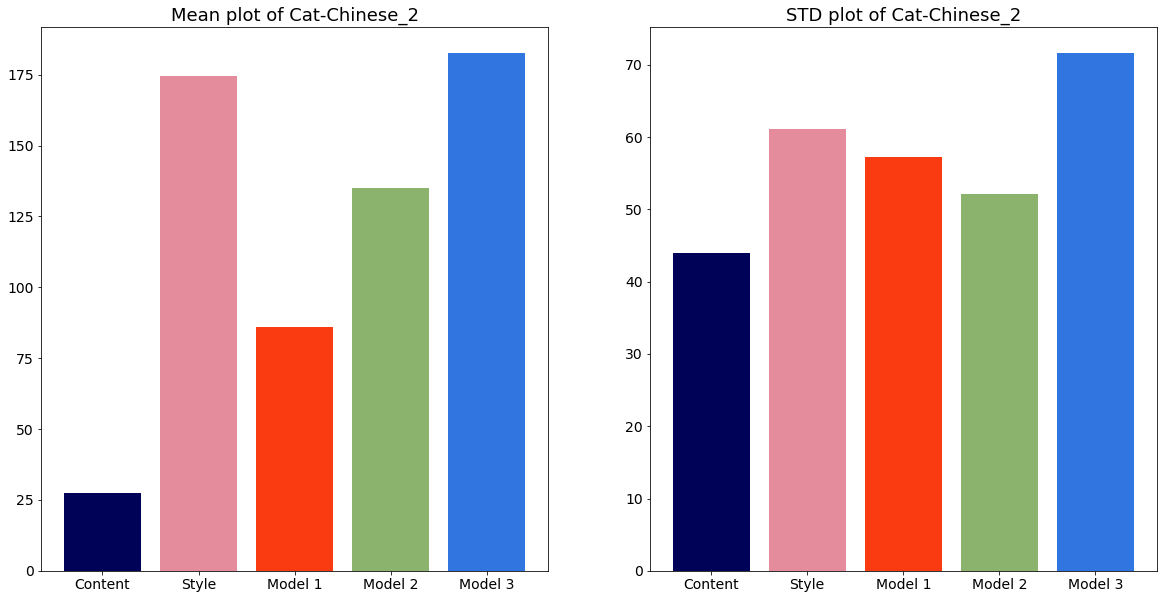

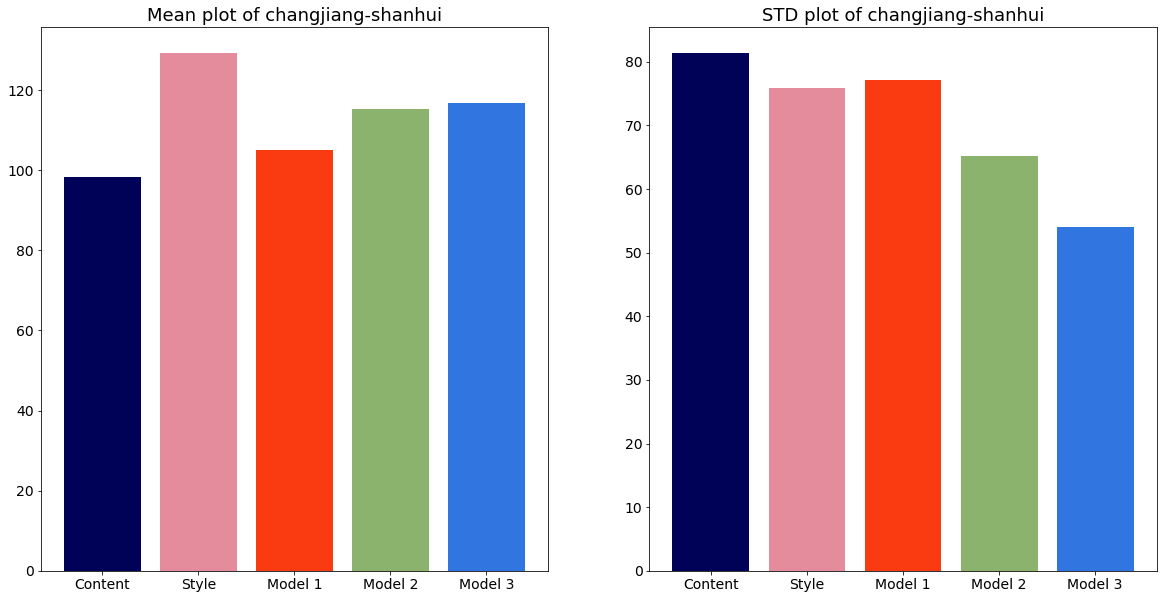

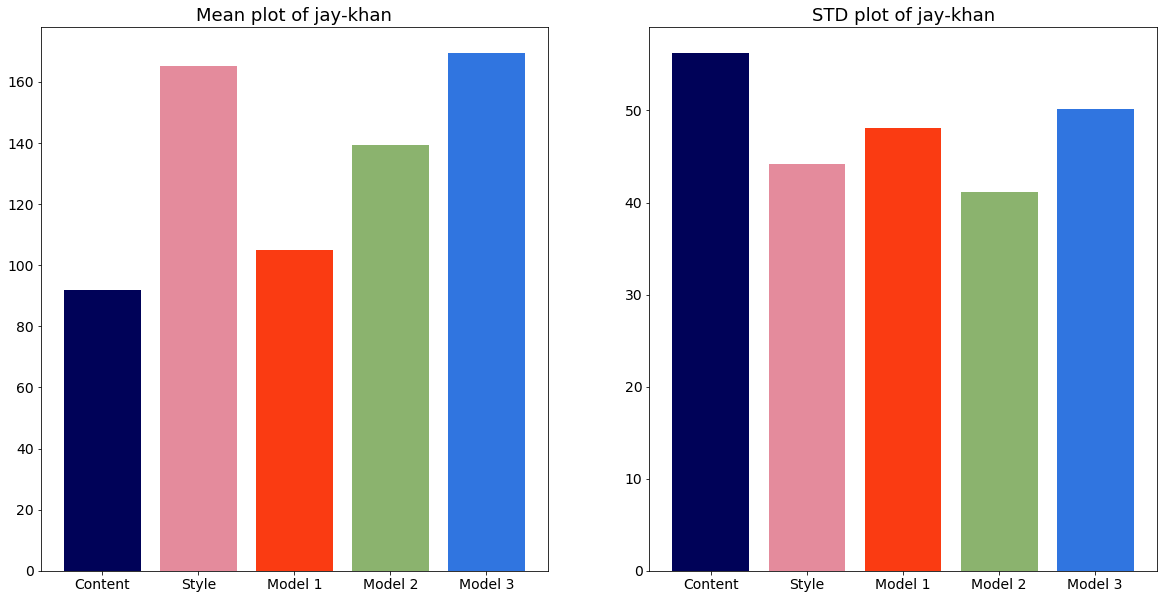

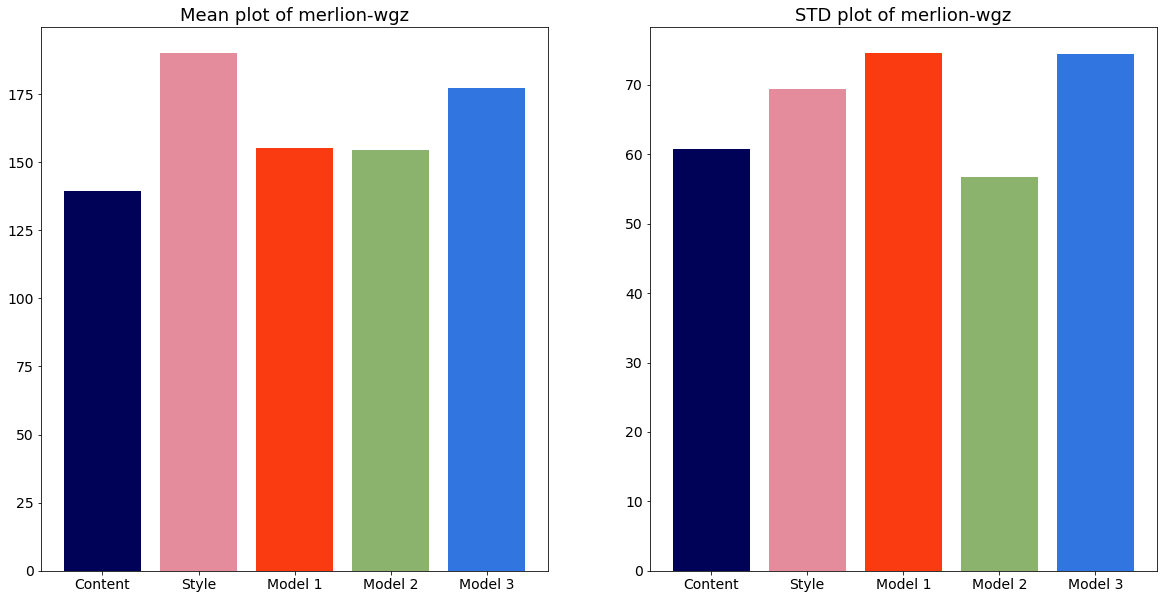

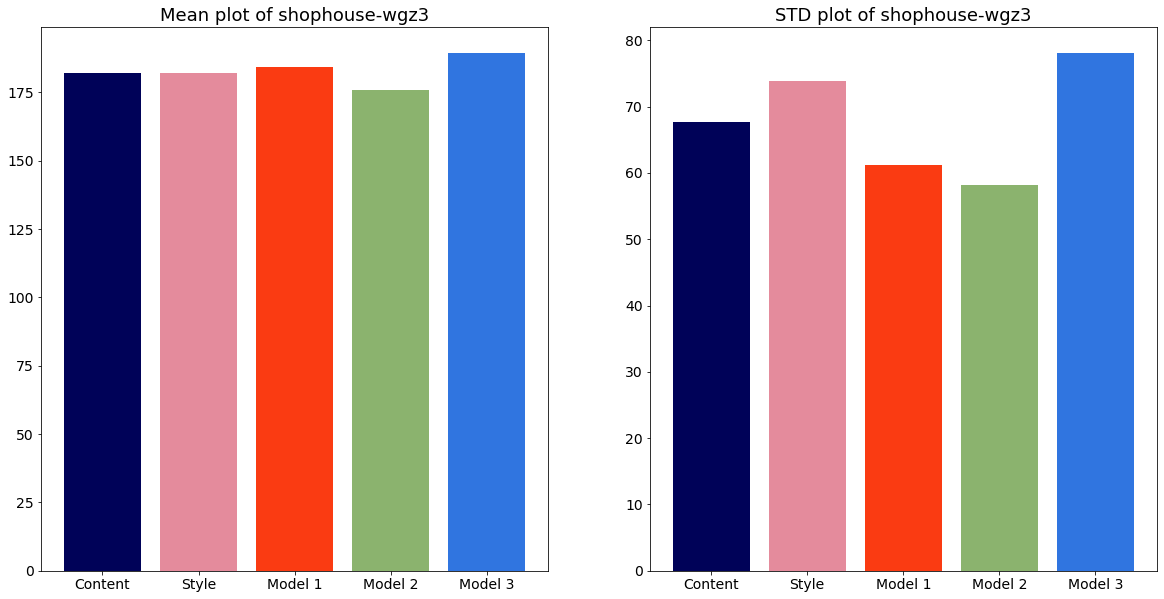

In [17]:
#List of title for all graphs 
title = ['Cat-Chinese_2', 'changjiang-shanhui','jay-khan','merlion-wgz','shophouse-wgz3']
#List of save path for all graphs
savepath = ['./img/Plot/cattest_plot.png', './img/Plot/cjtest_plot.png','./img/Plot/jaytest_plot.png',
           './img/Plot/merliontest_plot.png', './img/Plot/shtest_plot.png']

#Plot all graph at once with loop
for i in range(5):
    eva_plot(content[i][0],style[i][0],i,title[i],savepath[i])

## Pixel Histogram Comparison

In [156]:
#Declare function to find histogram values of image
def eva_hist(path):
    img = cv.imread(path)
    hist_full = cv.calcHist([img],[0],None,[256],[0,256])
    return hist_full

#Declare function to plot graph
def plot_hist(content, style, num, title, savepath):
    hist = []
    hist.append(eva_hist(content)) #Add content hist value
    hist.append(eva_hist(style))   #Add style hist value
    
    label= ['Content','Style','Model 1', 'Model 2','Model 3'] #label name for graph
    
    sns.set_palette("Set2") #Set palette
    
    for i in range(len(result)):
        hist.append(eva_hist(result[i][num])) #Append hist value of each model
    
    #Plot graph
    fig, ax = plt.subplots(figsize=(20,10))
    for i in range(5):
        ax.plot(hist[i])
    ax.set_title('Histogram plot of '+ title ,fontsize=18)
    ax.tick_params(labelsize=14)
    ax.set_xlim([0,256])
    ax.legend(label, fontsize=15)
    #Save graph
    plt.savefig(savepath)

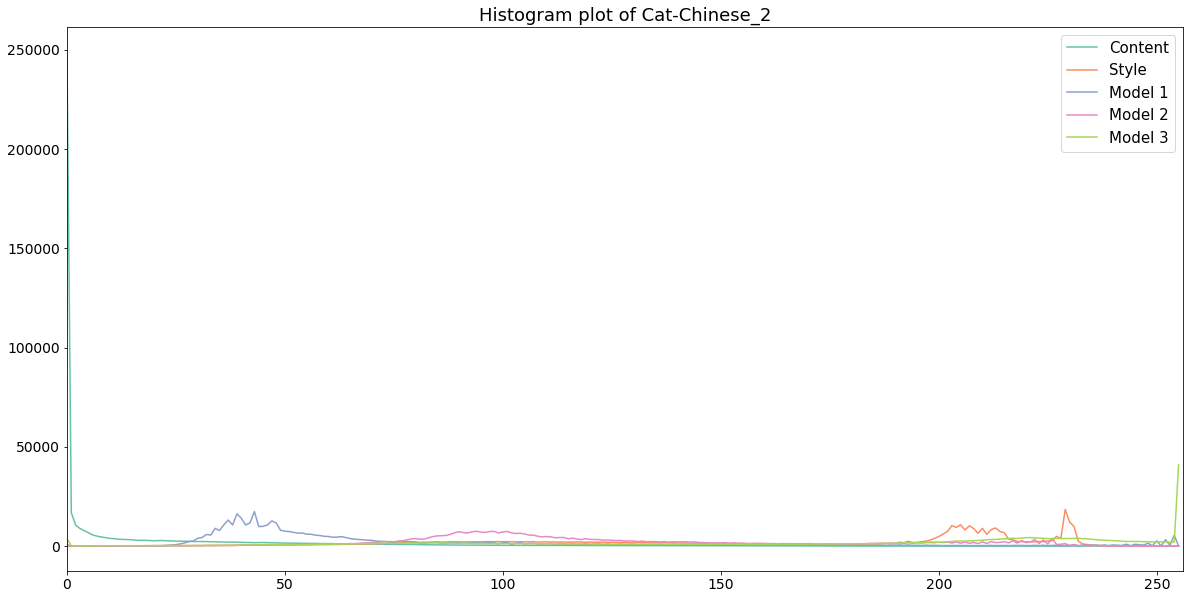

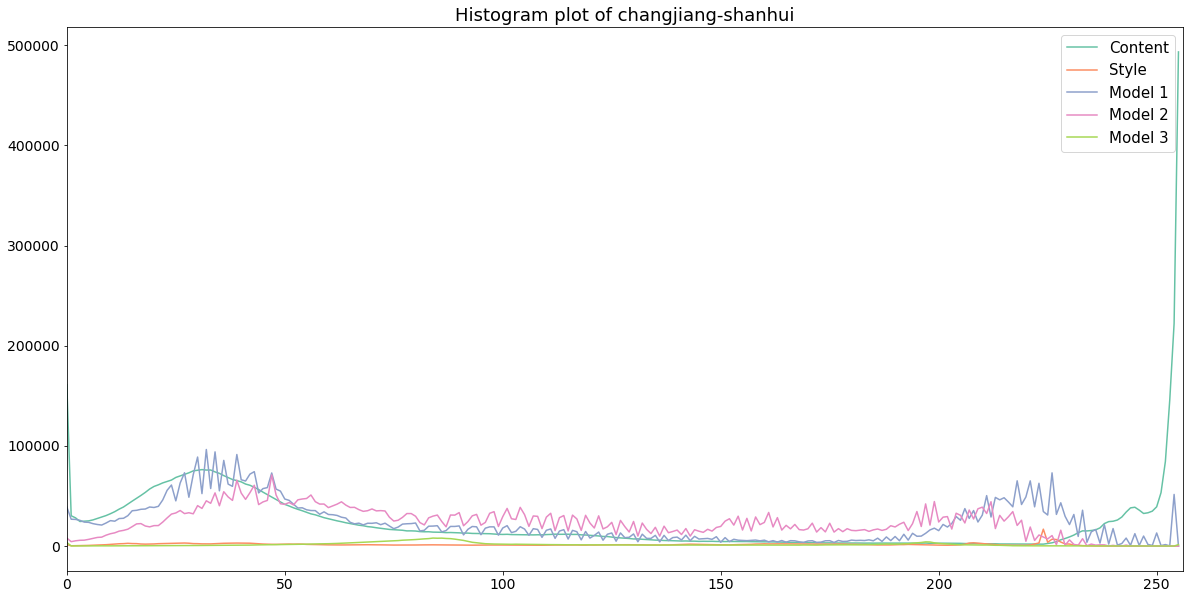

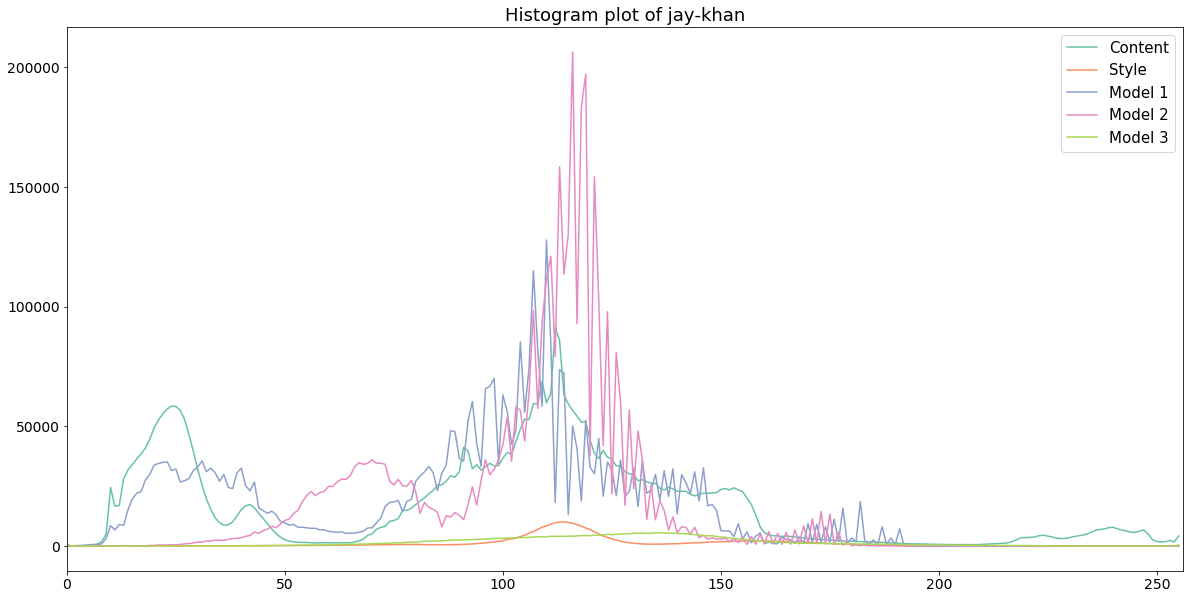

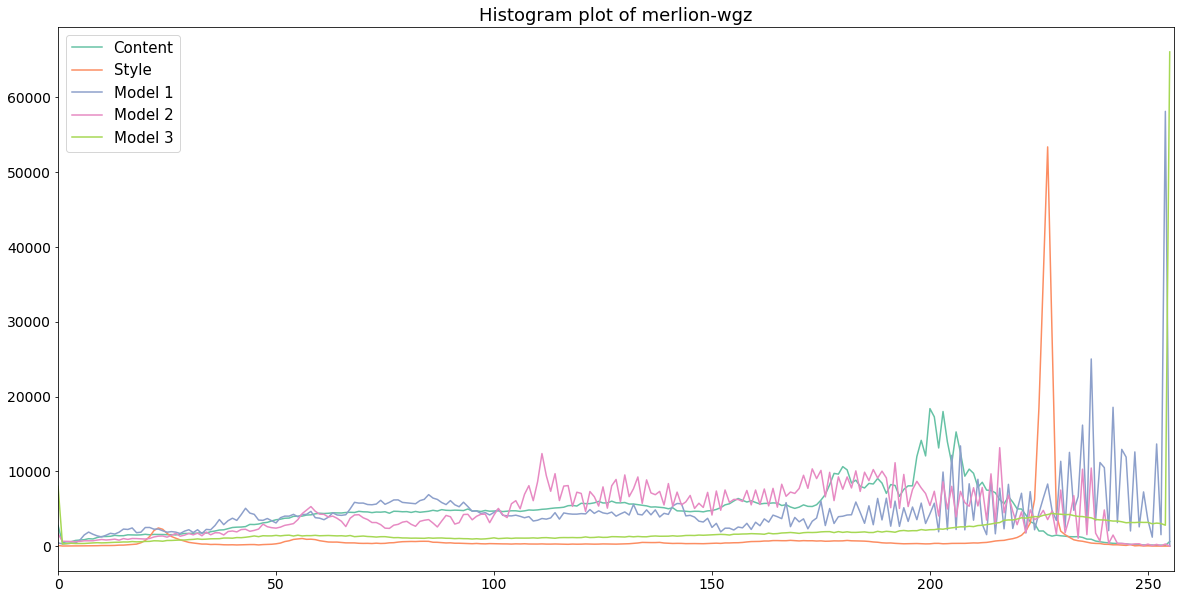

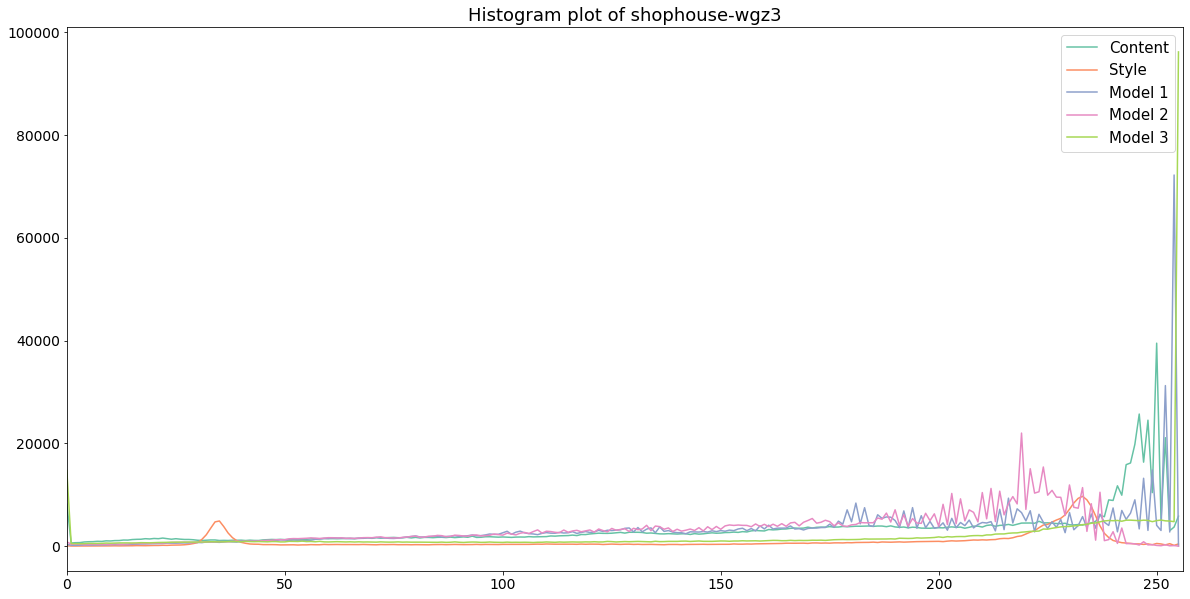

In [157]:
title = ['Cat-Chinese_2', 'changjiang-shanhui','jay-khan','merlion-wgz','shophouse-wgz3']
savepath = ['./img/Plot/cattest_histplot.png', './img/Plot/cjtest_histplot.png','./img/Plot/jaytest_histplot.png',
           './img/Plot/merliontest_histplot.png', './img/Plot/shtest_histplot.png']

for i in range(5):
    plot_hist(content[i][0],style[i][0],i,title[i],savepath[i])

## Evaluation From Google Form Vote

In [6]:
#Read vote csv
vote = pd.read_csv('./NST_vote.csv')
vote.head()

,Timestamp,The 1st set of images are generated based on the two images below. (You don't have to response to this qns),Which cat looks the best?,The 2nd set of images are generated based on the two images below. (You don't have to response to this qns),Which Jay looks the best?,The 3rd set of images are generated based on the two images below. (You don't have to response to this qns),Which Merlion looks the best?,The 4th set of images are generated based on the two images below. (You don't have to response to this qns),Which shophouses look the best?,The 5th set of images are generated based on the two images below. (You don't have to response to this qns),Which mountain looks the best?
0,2020/03/09 1:11:39 PM GMT+8,NaN,Option 3,NaN,Option 3,NaN,Option 3,NaN,Option 1,NaN,Option 1
1,2020/03/09 1:12:45 PM GMT+8,Content Image,Option 1,NaN,Option 2,NaN,Option 1,NaN,Option 2,NaN,Option 2
2,2020/03/09 1:12:50 PM GMT+8,NaN,Option 3,NaN,Option 2,NaN,Option 3,NaN,Option 3,NaN,Option 2
3,2020/03/09 1:13:50 PM GMT+8,NaN,Option 3,NaN,Option 2,NaN,Option 3,NaN,Option 3,NaN,Option 2
4,2020/03/09 1:16:42 PM GMT+8,NaN,Option 3,NaN,Option 1,NaN,Option 3,NaN,Option 1,NaN,Option 3


In [7]:
#Drop unwanted columns
vote = vote[['Which cat looks the best?','Which Jay looks the best?','Which Merlion looks the best?','Which shophouses look the best?','Which mountain looks the best?']]
#Rename columns
vote.columns = ['cat','jay','merlion','shophouse','mountain']
vote.head()

,cat,jay,merlion,shophouse,mountain
0,Option 3,Option 3,Option 3,Option 1,Option 1
1,Option 1,Option 2,Option 1,Option 2,Option 2
2,Option 3,Option 2,Option 3,Option 3,Option 2
3,Option 3,Option 2,Option 3,Option 3,Option 2
4,Option 3,Option 1,Option 3,Option 1,Option 3


In [8]:
#Check df
vote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
cat          37 non-null object
jay          37 non-null object
merlion      37 non-null object
shophouse    37 non-null object
mountain     37 non-null object
dtypes: object(5)
memory usage: 1.5+ KB


In [9]:
#Map values 
mapping = {'Option 3':'Model 3', 'Option 2':'Model 2', 'Option 1': 'Model 1'}
for i in vote:
    vote[i] = vote[i].map(mapping)
vote.head()

,cat,jay,merlion,shophouse,mountain
0,Model 3,Model 3,Model 3,Model 1,Model 1
1,Model 1,Model 2,Model 1,Model 2,Model 2
2,Model 3,Model 2,Model 3,Model 3,Model 2
3,Model 3,Model 2,Model 3,Model 3,Model 2
4,Model 3,Model 1,Model 3,Model 1,Model 3


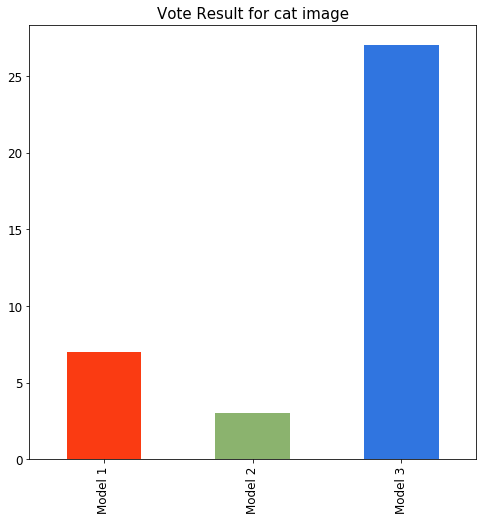

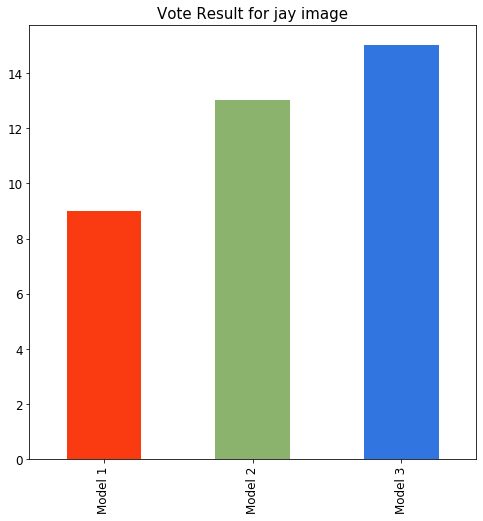

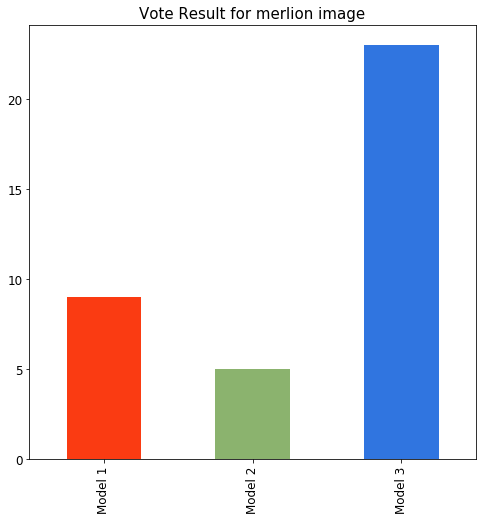

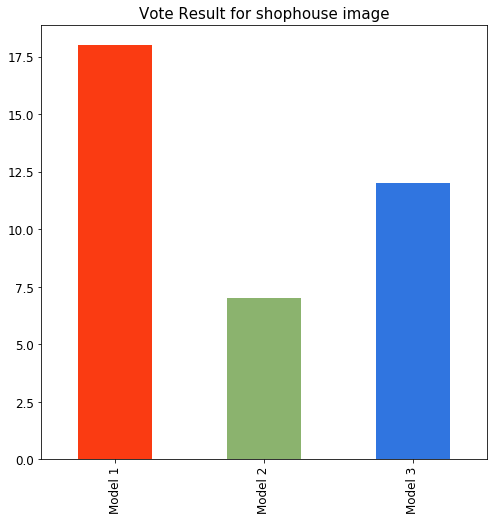

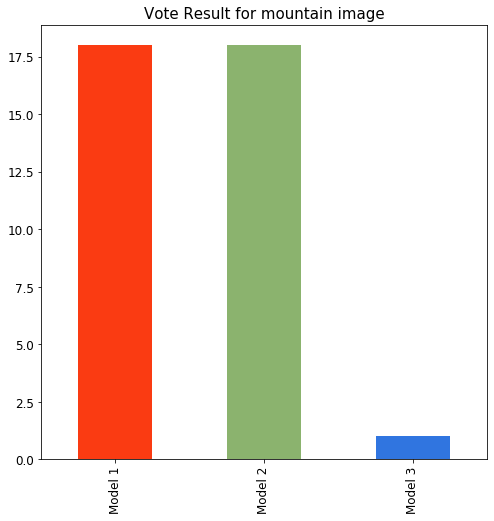

In [15]:
#Plot bar plot of vote results
color = ['#FA3B12','#8BB36E','#3075E0']
for i in vote:
    plt.figure(figsize=(8,8))
    vote[i].value_counts().reindex(['Model 1','Model 2','Model 3']).plot(kind='bar', color=color,fontsize=12)
    plt.title('Vote Result for ' + i + ' image', fontsize=15)
    plt.savefig('./img/Plot/' + i + '_voteplot.png')